In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Path to your saved embeddings
npz_path = Path("../data/output/map_out/maps_embeddings.npz")

data = np.load(npz_path, allow_pickle=True)
E = data["E"]          # (num_maps, embedding_dim)
ids = data["ids"]      # (num_maps,)
E.shape, len(ids)


((300, 158), 300)

In [2]:
df_stats = pd.DataFrame({
    "mean": E.mean(axis=0),
    "std": E.std(axis=0),
    "min": E.min(axis=0),
    "max": E.max(axis=0)
})
display(df_stats.describe())

print(f"Global mean of all features: {E.mean():.4f}")
print(f"Global std of all features:  {E.std():.4f}")


,mean,std,min,max
count,158.000000,158.000000,158.000000,158.000000
mean,0.308406,0.032482,0.221581,0.412553
std,0.368880,0.044143,0.322851,0.415279
min,0.000000,0.000000,0.000000,0.000000
25%,0.015925,0.003151,0.005040,0.029063
50%,0.078218,0.014436,0.029214,0.197486
75%,0.656421,0.044635,0.415306,0.887427
max,1.000000,0.265929,1.000000,1.172796


Global mean of all features: 0.3084
Global std of all features:  0.3718


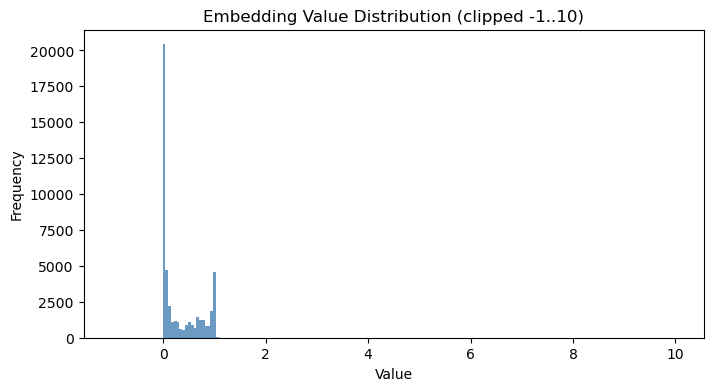

In [4]:
plt.figure(figsize=(8,4))
plt.hist(E.flatten(), bins=200, range=(-1, 10), color="steelblue", alpha=0.8)
plt.title("Embedding Value Distribution (clipped -1..10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [5]:
# Count maps (rows) that are completely zero
num_zero_rows = np.sum(~E.any(axis=1))
perc_zero_rows = 100 * num_zero_rows / len(E)

# Count individual zero elements
num_zero_elements = np.sum(E == 0)
perc_zero_elements = 100 * num_zero_elements / E.size

print(f"Maps with all-zero embeddings: {num_zero_rows} / {len(E)} ({perc_zero_rows:.2f}%)")
print(f"Individual zero values: {num_zero_elements:,} ({perc_zero_elements:.2f}%)")


Maps with all-zero embeddings: 0 / 300 (0.00%)
Individual zero values: 3,202 (6.76%)


In [6]:
import numpy as np
import pandas as pd
import json

# --- Load embeddings and feature names ---
data = np.load("../data/output/map_out/maps_embeddings.npz", allow_pickle=True)
E = data["E"]

# try to load feature names if available
try:
    with open("../data/output/map_out/feature_names.json", "r") as f:
        feature_names = json.load(f)
except Exception:
    feature_names = [f"f{i:03d}" for i in range(E.shape[1])]

# --- Compute statistics for each feature ---
df_stats = pd.DataFrame({
    "feature": feature_names,
    "min":  E.min(axis=0),
    "max":  E.max(axis=0),
    "mean": E.mean(axis=0),
    "median": np.median(E, axis=0),
    "std":  E.std(axis=0),
    "mode": [pd.Series(E[:, i]).mode(dropna=True).iloc[0] 
             if not pd.Series(E[:, i]).mode(dropna=True).empty else np.nan
             for i in range(E.shape[1])]
})

# --- Sort by max absolute value to highlight large features ---
df_stats["abs_max"] = df_stats["max"].abs()
df_stats = df_stats.sort_values("abs_max", ascending=False)

# --- Display nicely ---
pd.set_option("display.max_rows", 50)
pd.set_option("display.precision", 4)
display(df_stats[["feature", "min", "max", "mean", "median", "std", "mode"]].head(30))


,feature,min,max,mean,median,std,mode
68,centroid_x__max,0.8336,1.1728,0.9995,1.0048,0.0381,0.8336
67,perimeter__max,0.1015,1.1525,0.2301,0.2095,0.1067,0.1015
69,centroid_y__max,0.7453,1.1065,0.9959,1.0052,0.0426,0.7453
134,centroid_x__q75,0.4142,1.0759,0.7392,0.7474,0.0905,0.4142
126,reflex_ratio__q50,0.8000,1.0000,0.9863,1.0000,0.0457,1.0000
116,convexity__q50,0.9542,1.0000,0.9982,1.0000,0.0070,1.0000
104,reflex_ratio__q25,0.7000,1.0000,0.8475,0.8333,0.0729,0.8333
148,reflex_ratio__q75,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000
94,convexity__q25,0.8690,1.0000,0.9714,0.9759,0.0247,1.0000
137,axis_ratio__q75,0.5602,1.0000,0.9341,0.9703,0.0839,1.0000


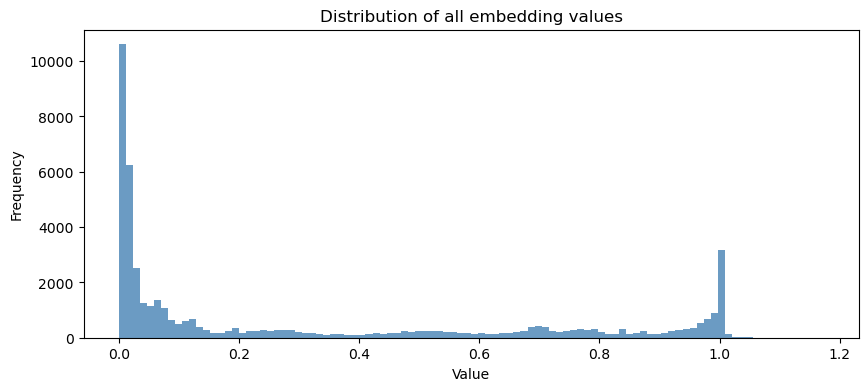

In [7]:
plt.figure(figsize=(10,4))
plt.hist(E.flatten(), bins=100, color="steelblue", alpha=0.8)
plt.title("Distribution of all embedding values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [8]:
nan_cols = np.isnan(E).any(axis=0)
inf_cols = np.isinf(E).any(axis=0)
const_cols = (E.std(axis=0) < 1e-6)

print(f"NaN dims: {nan_cols.sum()}, Inf dims: {inf_cols.sum()}, Constant dims: {const_cols.sum()}")


NaN dims: 0, Inf dims: 0, Constant dims: 11


Mean cosine similarity: 0.987, Std: 0.007


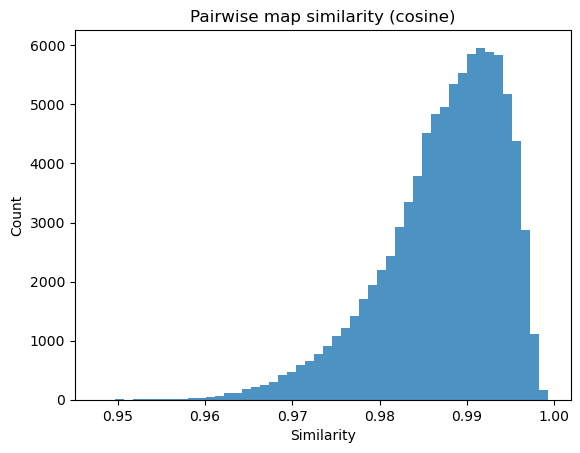

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

S = cosine_similarity(E)
np.fill_diagonal(S, np.nan)
print(f"Mean cosine similarity: {np.nanmean(S):.3f}, Std: {np.nanstd(S):.3f}")
plt.hist(S[~np.isnan(S)], bins=50, alpha=0.8)
plt.title("Pairwise map similarity (cosine)")
plt.xlabel("Similarity")
plt.ylabel("Count")
plt.show()


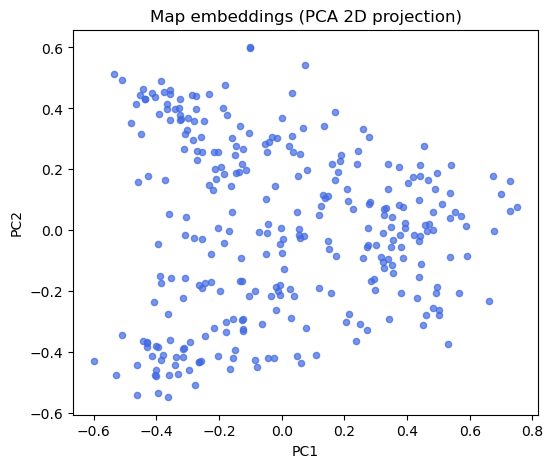

Explained variance ratio: 0.39053625


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
E2d = pca.fit_transform(E)
plt.figure(figsize=(6,5))
plt.scatter(E2d[:,0], E2d[:,1], s=20, c='royalblue', alpha=0.7)
plt.title("Map embeddings (PCA 2D projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_.sum())


In [11]:
import numpy as np, pandas as pd, json
from pathlib import Path

ROOT = Path("../data/output/map_out")
npz = np.load(ROOT / "maps_embeddings.npz", allow_pickle=True)
E   = npz["E"]            # shape: (num_maps, 256)
ids = npz["ids"]

# Load feature names
try:
    feat_names = json.load(open(ROOT / "feature_names.json"))
except Exception:
    feat_names = [f"f{i:03d}" for i in range(E.shape[1])]

assert E.shape[1] == len(feat_names), f"Dim mismatch: E has {E.shape[1]} cols, names={len(feat_names)}"

# Per-dimension stats across maps
df_values = pd.DataFrame(E, columns=feat_names)
agg = pd.DataFrame({
    "feature": df_values.columns,
    "min":     df_values.min(axis=0).values,
    "max":     df_values.max(axis=0).values,
    "mean":    df_values.mean(axis=0).values,
    "std":     df_values.std(axis=0).values,
})

# Split "base__stat" if available
def split_feature(name):
    if "__" in name:
        b, s = name.split("__", 1)
    else:
        b, s = name, "raw"
    return b, s

base_stat = [split_feature(f) for f in agg["feature"]]
agg["base"] = [b for b, _ in base_stat]
agg["stat"] = [s for _, s in base_stat]

# Simple normalization flags (tweak thresholds as you like)
MEAN_ABS_THR = 1.0
STD_THR      = 1.0
RANGE_THR    = 6.0     # e.g., expect most normalized features to stay within ~[-3, +3]

agg["abs_mean"] = agg["mean"].abs()
agg["range"]    = agg["max"] - agg["min"]

agg["flag_abs_mean"] = agg["abs_mean"] > MEAN_ABS_THR
agg["flag_std"]      = agg["std"] > STD_THR
agg["flag_range"]    = agg["range"] > RANGE_THR
agg["flags_total"]   = agg[["flag_abs_mean","flag_std","flag_range"]].sum(axis=1)

# Sort by “most suspicious”
agg_sorted = agg.sort_values(["flags_total","std","abs_mean","range"], ascending=[False, False, False, False])

# Display the main 256× table
cols = ["feature","base","stat","min","max","mean","std","abs_mean","range","flag_abs_mean","flag_std","flag_range"]
display(agg_sorted[cols].reset_index(drop=True))

# Also: quick group view to see which base features misbehave across stats
group = (
    agg.groupby(["base","stat"])
       .agg(min_min=("min","min"),
            max_max=("max","max"),
            mean_mean=("mean","mean"),
            mean_std=("mean","std"),
            std_mean=("std","mean"),
            std_std=("std","std"))
       .reset_index()
       .sort_values(["std_mean","mean_std"], ascending=False)
)
display(group.head(40))

,feature,base,stat,min,max,mean,std,abs_mean,range,flag_abs_mean,flag_std,flag_range
0,orient_sin__q50,orient_sin,q50,1.8423e-03,0.9997,0.5224,0.2664,0.5224,0.9979,False,False,False
1,orient_cos__q50,orient_cos,q50,7.8747e-04,0.9972,0.5199,0.2210,0.5199,0.9964,False,False,False
2,orient_sin__q25,orient_sin,q25,3.5113e-04,0.9979,0.1648,0.1628,0.1648,0.9975,False,False,False
3,orient_cos__q25,orient_cos,q25,4.3117e-05,0.7145,0.2119,0.1477,0.2119,0.7145,False,False,False
4,orient_cos__q75,orient_cos,q75,5.0885e-01,0.9998,0.7885,0.1469,0.7885,0.4910,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,has_hole__min,has_hole,min,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
154,nn_dist_median__min,nn_dist_median,min,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
155,has_hole__q25,has_hole,q25,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
156,has_hole__q50,has_hole,q50,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False


,base,stat,min_min,max_max,mean_mean,mean_std,std_mean,std_std
130,orient_sin,q50,1.8423e-03,0.9997,0.5224,NaN,0.2664,NaN
123,orient_cos,q50,7.8747e-04,0.9972,0.5199,NaN,0.2210,NaN
129,orient_sin,q25,3.5113e-04,0.9979,0.1648,NaN,0.1628,NaN
122,orient_cos,q25,4.3117e-05,0.7145,0.2119,NaN,0.1477,NaN
124,orient_cos,q75,5.0885e-01,0.9998,0.7885,NaN,0.1469,NaN
131,orient_sin,q75,5.0657e-01,0.9999,0.8480,NaN,0.1385,NaN
84,has_hole,max,0.0000e+00,1.0000,0.0203,NaN,0.1358,NaN
140,poly_count,raw,3.1686e-01,1.0000,0.4582,NaN,0.1141,NaN
39,centroid_y,q50,2.1391e-01,0.8155,0.5069,NaN,0.1077,NaN
133,perimeter,max,1.0147e-01,1.1525,0.2301,NaN,0.1069,NaN


In [12]:
import pandas as pd

cols = [
    "feature","base","stat","min","max","mean","std",
    "abs_mean","range","flag_abs_mean","flag_std","flag_range","flags_total"
]

out_path = "map_embedding_diagnostics.xlsx"

# Ensure agg_sorted and group exist and have data
if 'agg_sorted' not in locals() or 'group' not in locals():
    raise ValueError("Please run the previous cell that generates `agg_sorted` and `group` first!")

with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
    agg_sorted[cols].to_excel(writer, sheet_name="per_dimension", index=False)
    group.to_excel(writer, sheet_name="grouped", index=False)

    wb = writer.book
    for sheet in ["per_dimension", "grouped"]:
        ws = writer.sheets[sheet]
        ws.freeze_panes(1, 0)
        # ws.dim_rowmax / ws.dim_colmax can be None on some xlsxwriter versions — use shape instead
        nrows, ncols = (agg_sorted.shape if sheet == "per_dimension" else group.shape)
        ws.autofilter(0, 0, nrows, ncols - 1)
        for i, width in enumerate([26,16,10] + [12]*(ncols-3)):
            ws.set_column(i, i, width)

print(f"✅ Excel file saved: {out_path}")

✅ Excel file saved: map_embedding_diagnostics.xlsx


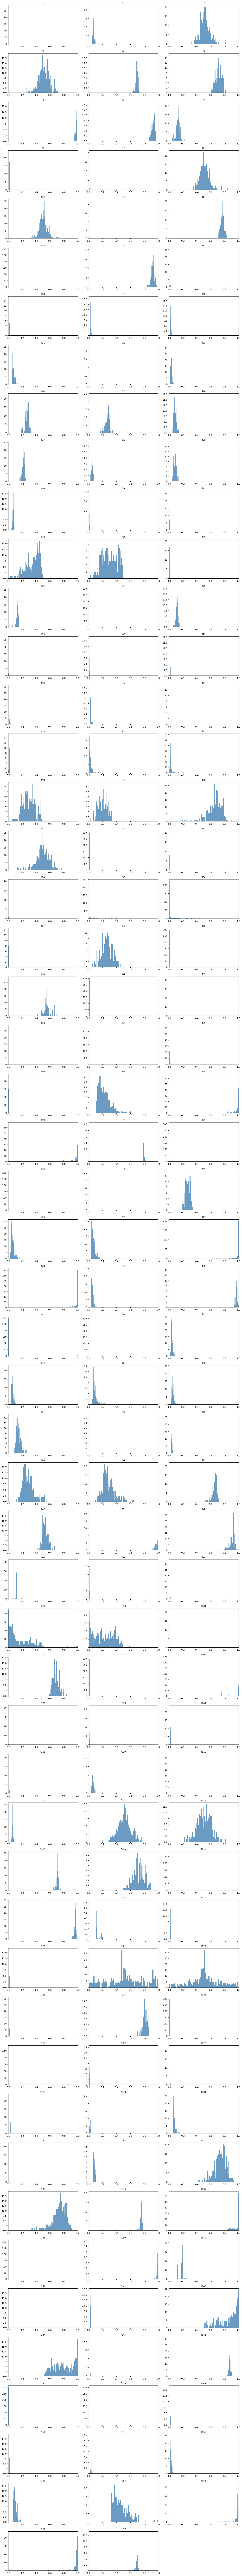

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Configuration ===
ROOT = Path("../data/output/map_out")
npz = np.load(ROOT / "maps_embeddings.npz", allow_pickle=True)
BINS = 60

# Expected normalized ranges (optional, for vertical reference lines)
expected_after = {
    "area": (0.0, 1.0),
    "perimeter": (0.0, 1.0),
    "centroid_x": (0.0, 1.0),
    "centroid_y": (0.0, 1.0),
    "circularity": (0.0, 1.0),
    "axis_ratio": (0.0, 1.0),
    "convexity": (0.0, 1.0),
    "rectangularity": (0.0, 1.0),
    "neighbor_count": (0.0, 1.0),
    "bbox_width": (0.0, 1.2),
    "bbox_height": (0.0, 1.2),
    "orient_sin": (0.0, 1.0),
    "orient_cos": (0.0, 1.0),
    "eq_diameter": (0.0, 1.0),
    "eccentricity": (0.0, 1.0),
    "has_hole": (0.0, 1.0),
    "reflex_ratio": (0.0, 1.0),
    "nn_dist_median": (0.0, 1.0),
    "knn1": (0.0, 1.0),
    "knn3": (0.0, 1.0),
    "density_r05": (0.0, 1.0),
    "density_r10": (0.0, 1.0),
}

# === Load NPZ ===
X, feat_names = None, None

# Find embeddings array
for key in ["embeddings", "X", "features", "data"]:
    if key in npz and npz[key].ndim == 2:
        X = npz[key]
        break

if X is None:
    arrs = [(k, v) for k, v in npz.items() if isinstance(v, np.ndarray) and v.ndim == 2]
    arrs.sort(key=lambda kv: kv[1].shape[0]*kv[1].shape[1], reverse=True)
    X = arrs[0][1]

# Find feature names
for key in ["feature_names", "features", "cols", "columns"]:
    if key in npz:
        maybe = npz[key]
        if isinstance(maybe, (list, tuple)) or (isinstance(maybe, np.ndarray) and maybe.ndim == 1):
            feat_names = [str(x) for x in list(maybe)]
            break

if feat_names is None:
    feat_names = [f"f{i}" for i in range(X.shape[1])]

# === Plot histograms ===
n_feats = len(feat_names)
n_cols = 3
n_rows = int(np.ceil(n_feats / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, name in enumerate(feat_names):
    col = X[:, i].astype(float)
    col = col[~(np.isnan(col) | np.isinf(col))]
    if col.size == 0:
        continue
    
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(col, bins=BINS, color="steelblue", alpha=0.8)
    plt.title(name, fontsize=10)
    plt.xlim(0, 1)  
    plt.xlabel("")
    plt.ylabel("")

    # Expected domain markers
    lo, hi = expected_after.get(name, (None, None))
    if lo is not None:
        plt.axvline(lo, color="red", linestyle="--", linewidth=0.8)
    if hi is not None:
        plt.axvline(hi, color="red", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()
